# 11.1 Graphical Models

We can use graphs to represent complex probability distributions. There are two main types:
1. ***Bayesian Networks***
    - These are DAGs. They are useful for representing causal relationships.
2. ***Markov Random Fields***
    - These are undirected graphs.

This chapter only deals with the first case of Bayes Nets

## 11.1.2 Factorization

We can display conditional distributions using directed graphs by relating dependent variables to indepent variables with directed edges. For example, given a join pdf $p(a, b, c)$ we may express the probability as a conditional probability by applying the product rule, such as:
$$p(a,b,c) = p(c|a, b)p(b|a)p(a)$$

This relationship is compactly expressable with a graph as:

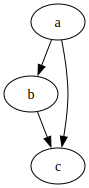

In [3]:
import graphviz
dot = graphviz.Digraph()
dot.node('a', 'a')
dot.node('b', 'b')
dot.node('c', 'c')

dot.edges(['ab', 'ac', 'bc'])

dot

Note, we are still expressing a joint probability distribution, just using conditional probabilities. The result on the left is an unconditional joint probability, while the expression on the right is determined by conditional probabilities. Although we will reach the same result, we could have chosen a different ordering and thereby produced a different graph...

The joint distribution defined by a graph is given by the product, over all nodes in the graph, of the conditional distributions for each node conditioned upon the variables corresponding to the parents of that node.\
For a graph with $K$ nodes, the joint distribution is:
$$p(x_1,...,x_K) = \prod_{k=1}^Kp(x_k|\text{pa}(k))$$
Where $\text{pa}()$ denotes the *set* of parents of node $x_k$

## 11.1.3 Discrete Variables

The pdf of a single discrete RV $x$ with $K$ possible states conditioned upon the parameters $\mu = (\mu_1,...,\mu_k)^\intercal$ is:
$$p(x|\mu) = \prod_{k=1}^K \mu_k^{x_k}$$

Then for two discrete RVs $x_1$ and $x_2$, each with $K$ states, we can express the joint probability of observing a combination $x_{1k}=1$ and $X_{2l}=1$ governed by parameter $\mu_{kl}$ as:
$$p(x_1,x_2|\mu) = \prod_{k=1}^K \prod_{l=1}^K \mu_{kl}^{x_{1k}x_{2l}} \ : \ \sum_k\sum_l\mu_{kl}=1$$

This distribution has $K^2 - 1$ free parameters (because they must sum to $1$). Growing to an arbitrary joint PDF of $M$ RVs, the space of free parameters grows exponentially to $K^M - 1$

**But wait!**, if $x_1$ and $x_2$ are *not independent*, then their joint PDF does indeed have $K^2 - 1$ free parameters. However, if they are *independent*, then there are actually only $2(K-1)$ free parameters! These being the $\mu_1$ parameters for $x_1$ and the $\mu_2$ parameters for $x_2$. Thus, joint PDFs over independent RVs scale linearly in parameter space.\
If $x_1$ and $x_2$ are dependent, then by the product rule:
$$p(x_1,x_2|\mu) = p(x_2|x_1)p(x_1|\mu)$$
Whereas if they are independent:
$$p(x_1,x_2|\mu_1, \mu_2) = p(x_1|\mu_1)p(x_2|\mu_2)$$
We can visualize this using graphs.

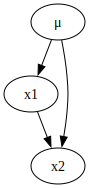

In [10]:
dot = graphviz.Digraph()
dot.node('μ', 'μ')
dot.node('x1', 'x1')
dot.node('x2', 'x2')
dot.edge('μ', 'x1'); dot.edge('μ', 'x2'); dot.edge('x1', 'x2')
dot

This takes $K-1$ free parameters to specify $x_1$ and then $K-1$ free parameters to specify $p(x_2|x_1)$ *for each* of the $K$ possible values of $x_1$. Thus the number of parameters is: 
$$(K-1) + K(K-1) = K^2 - 1$$

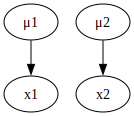

In [11]:
dot = graphviz.Digraph()
dot.node('μ1', 'μ1'); dot.node('μ2', 'μ2') 
dot.node('x1', 'x1')
dot.node('x2', 'x2')
dot.edge('μ1', 'x1'); dot.edge('μ2', 'x2')
dot

In this independent case, $p(x_1|\mu_1)$ has $K-1$ free parameters and $p(x_2|\mu_2)$ has $K-14 free parameters yielding a total of $$2(K-1)$$

So, fully connected graphs require $K^M - 1$ free parameters and fully unconnected graphs require $M(K-1)$ free parameters. But there are many gradations in-between. Chained distributions that only depend upon the immediately preceding state (like Markov processes) are such an intermediary since they are quadratic in $K$ but scale linearly in the number of RVs (states) $M$:

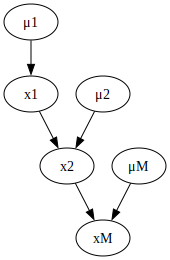

In [13]:
dot = graphviz.Digraph()
nodes = ['μ1', 'μ2', 'μM', 'x1', 'x2', 'xM']
for n in nodes:
    dot.node(n)
dot.edge('μ1', 'x1')
dot.edge('μ2', 'x2')
dot.edge('μM', 'xM')
dot.edge('x1', 'x2')
dot.edge('x2', 'xM')
dot

Here, each marginal probability $p(x_t|\mu_t)$ has $K-1$ free parameters. Then each conditional probability $p(x_t|x_{t-1})$ has $K(K-1)$ free parameters. And the total number of conditional probabilities scales with the number of RVs (states) $M$. So, the total number of free parameters in the chain is:
$$(K-1) + MK(K-1)$$

There are many others besides. I guess the big thing to note in this section is that we may use these graphs to efficiently describe the space of free parameters in a model. Each edge denotes some number of free parameters that specify the possible states for the nodes (RVs) that it connects. Then we can determine the total number of free parameters by counting the number of edges and evaluating how the number of edges grows as we increase the number of variables (nodes).

## 11.1.4 Gaussian Variables

Now we consider graphs with nodes that represent continuous Gaussian RVs where each distribution is conditional upon the state of its parents in the graph. Specifically, the mean of each Gaussian RV is a given as a linear function of the paret Gaussians. This class of models is called ***Linear-Gaussian Models***.

The model is a DAG over $D$ Gaussian RVs, in which node $i$ is a single Guassian RV $x_i$ with mean given by a linear combination of node $i$'s parent nodes:
$$p(x_1|\text{pa(i)}) = \mathcal{N}\bigg(x_i | \sum_{j\in\text{pa}(i)} w_{ij}x_j + b_i, \ v_i\bigg)$$
Where $v_i$ is the variance of the conditional distribution for $x_i$. 

Taking the log of the joint distribution of all states in the DAG yields:
$$
\begin{align*}
& \ln p(x) = \sum_{i=1}^D\ln p(x_i|\text{pa}(i)) \\
& \ \ \ \ \ \ \ \ \ \ \ \ = -\sum_{i=1}^D\frac{1}{2v_i}\bigg(x_i - \sum_{j\in\text{pa}(i)}w_{ij}x_j - b_i\bigg)^2 +\text{const}
\end{align*}
$$
Where "const" is all terms independent of $x$.

The mean of each variable is given recursively by: $$E[x_i] = \sum_{j\in\text{pa}(i)} w_{ij} E[x_j] + b_i$$
Due to the linearity of expectation.\
So, we can find the mean for each component by starting at the earliest node, and working recursively down the graph.

The covariances are similarly determined recursively by: $$\text{cov}[x_i, x_j] = \sum_{k\in\text{pa}(j)} w_{jk}\text{cov}[x_i, x_k] + I_{ij}v_j$$

This is readily extendable to multivariate Guassian RV nodes as well.

## 11.1.6 Parameters and Observations


**NOTATION:**\
The book introduces "*plates*" to group nodes in graphs. These plates denote a number (such as $N$) nodes allowing us to express them compactly instead of drawing each node individually.\
Example:

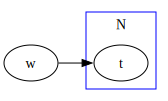

In [17]:
dot = graphviz.Digraph()
dot.attr(rankdir='LR')  # set left-->right direction
dot.node('w')

with dot.subgraph(name='cluster_t') as plate:  # name must start with "cluster_" to be a plate
    plate.attr(label='N', color='blue')
    plate.node('t')

dot.edge('w', 't')

dot

We will also denote parameters as nodes without circles (i.e. just as floating variables) so that they are explicitly different from observable RVs. E.g.:

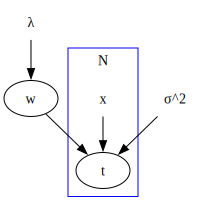

In [20]:
dot = graphviz.Digraph()
# dot.attr(rankdir='LR')  # set left-->right direction
dot.node('λ', shape='plaintext')
dot.node('w')
dot.edge('λ', 'w')

with dot.subgraph(name='cluster_t') as plate:  # name must start with "cluster_" to be a plate
    plate.attr(label='N', color='blue')
    plate.node('x', shape='plaintext')
    plate.node('t')
    plate.edge('x', 't')
    
dot.node('σ^2', shape='plaintext')


dot.edge('w', 't')
dot.edge('σ^2', 't')

dot

# 11.2 Conditional Independence

Consider three RVs $a, b, and c$ such that the conditional distribution $p(a|b,c)$ *does not depend* on the value of $b$: $$p(a|b,c) = p(a|c)$$
In such a case, $a$ is *conditionally independent* of $b$ given $c$. Then the joint distribution of $a$ and $b$ conditioned on $c$ is:
$$p(a,b|c) = p(a|b, c)p(b|c) = p(a|c)p(b|c)$$
Here, due to conditional independence, the joint distribution of $a$ and $b$ factorizes into the product of their marginal distributions conditioned on $c$.

A shorthand expression for conditional independence is: $$a \perp b | c$$
Meaning: $a$ is independent of $b$ when conditioned upon $c$

We can use graphs to determine conditional independence through a general framework called ***D-Separation*** (where "D" stands for "directed").

## 11.2.1 Three Example Graphs

#### Example 1:
$$p(a,b,c) = p(a|c)p(b|c)p(c)$$
This is a case where $a$ and $b$ are conditionally independent of eachother given $c$.\
Graphically:

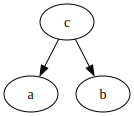

In [21]:
dot = graphviz.Digraph()
for n in ['a', 'b', 'c']: dot.node(n)
dot.edge('c', 'a'); dot.edge('c', 'b')
dot

Marginalizing over $c$ gives $p(a, b)$ as: $$p(a,b) = \sum_c p(a|c)p(b|c)p(c)$$
This is not guaranteed to equal $p(a)p(b)$, so the variables $a$ and $b$ need not be independent of eachother *unconditional* on $c$.\
However, if we condition on $c$, then: $$p(a, b|c) = \frac{p(a,b,c)}{p(c)} = p(a|c)p(b|c)$$
Which *does entail* $a\perp b |c$

There is a sense in which $a$ and $b$ may have a dependent relationship over the entire space of observable values for $c$.\
But given any value of $c$, the two are independent.

For instance, having observed some value of $a$, but not $c$ or $b$, we know that $c$ is probabilistically limited to the values which entail the observed value of $a$. By extension, $b$ is probabilistically limited by those corresponding values of $c$. However, once $c$ is observed, it does not matter what the value of $a$ is in determining the value of $b$. All of the information that we can use to predict $b$ is given by the observed value of $c$. Thus, the predicted value of $b$ given $c$ is conditionally independent of $a$.

#### Example 2:
$$p(a,b,c) = p(a)p(c|a)p(b|c)$$

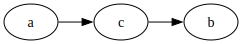

In [24]:
dot = graphviz.Digraph()
dot.attr(rankdir='LR')
for n in ['a', 'b', 'c']: dot.node(n)
dot.edge('a', 'c'); dot.edge('c', 'b')
dot

Again, marginalizing over $c$ does not generally equal $p(a)p(b)$, so this fails unconditional independence:
$$p(a,b) = p(a)\sum_c p(c|a)p(b|c) = p(a)p(b|a) \ne p(a)p(b)$$

Now, take $c$ as given - i.e. assume that we've observed a value of $c$. By Bayes' Theorem:
$$p(a,b|c) = \frac{p(a,b,c)}{p(c)} = \frac{p(a)p(c|a)p(b|c)}{p(c)} = p(a|c)p(b|c)$$

So, conditional independence holds.\
Once again, all that we need to predict $b$ is the value of $c$. But if we don't know the value of $c$ then we can use what is known about $a$ to predict $b$ by inferring the value of $c$.

#### Example 3:
$$p(a,b,c) = p(a)p(b)p(c|a,b)$$

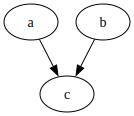

In [25]:
dot = graphviz.Digraph()
for n in ['a', 'b', 'c']: dot.node(n)
dot.edge('a', 'c'); dot.edge('b', 'c')
dot

This is a ***Collider*** graph. Here, $c$ depends upon $a$ and $b$. Moreover, marginalizing over $c$ *does yield* $p(a)p(b)$ so $a$ and $b$ are unconditionally independent:
$$p(a, b) = p(a)p(b)\sum_c p(a,b|c) = p(a)p(b)$$

However, in this case $a$ and $b$ are **conditionally dependent**! We can see this by conditioning on $c$:
$$p(a,b|c) = \frac{p(a,b,c)}{p(c)} = \frac{p(a)p(b)p(c|a,b)}{p(c)} \ne p(a|c)p(b|c)$$

So, if we do not know $c$, then knowing $a$ tells us nothing about the likely states of $b$

## 11.2.2 Explaining Away

The text provides a good, but lengthy, example to describe explaining away.\
The gist of this concept is that we can use the observed value of a collider node (like $c$ above) to make predictions about the values of its parent nodes via Bayes' Theorem. Then, combining that observation with the observed value of one of the parent nodes allows us to make even more precise predictions about the other unobserved parent node. I can imagine a general usefulness of this in practice when some variables are difficult or impossible to observe. Structuring models/experiments wherein such variables are a parent of a collider can then be useful for conducting inference about the unobservable variable.

## 11.2.3 D-Separation

Consider a DAG with *non-intersecting* sets of nodes denoted $A$, $B$, and $C$. The objective is to determine whether $A\perp B |C$ is implied by a given DAG. We consider all possible paths from *any* node in $A$ to *any* node in $B$. Any such path is ***blocked*** if it includes a node such that either:
1. The arrows on the path meet either head-to-tail or tail-to-tail at the node and the node is in $C$
2. The arrows meet head-to-head at the node and neither the node, nor any of its descendents is in set $C$

If *all* paths are blocked, then $A$ is d-separated from $B$ by $C$, and the joint distribution over all variables in the graph will satisfy $A \perp B | C$

## 11.2.4 Naive Bayes

Naive Bayes does classification using conditional independences to simplify model structure.\
Assume we have a vector $x$ which we want to assign to one of $K$ classes. We can define $p(x|C_k)$ for each class as the probability of observing $x$ given that it belongs to class $C_k$. The **key assumption** of naive Bayes is that, conditioned on the class $C_k$, the distribution of $x$ factorizes into the product of two or more densities.\
Partitioning the vector $x$ into $L$ elements, $x=(x^{(1)},...,x^{(L)})$$, naive Bayes takes the form:
$$p(x|C_k) = \prod_{l=1}^L p(x^{(l)}|C_k)$$

<Axes: >

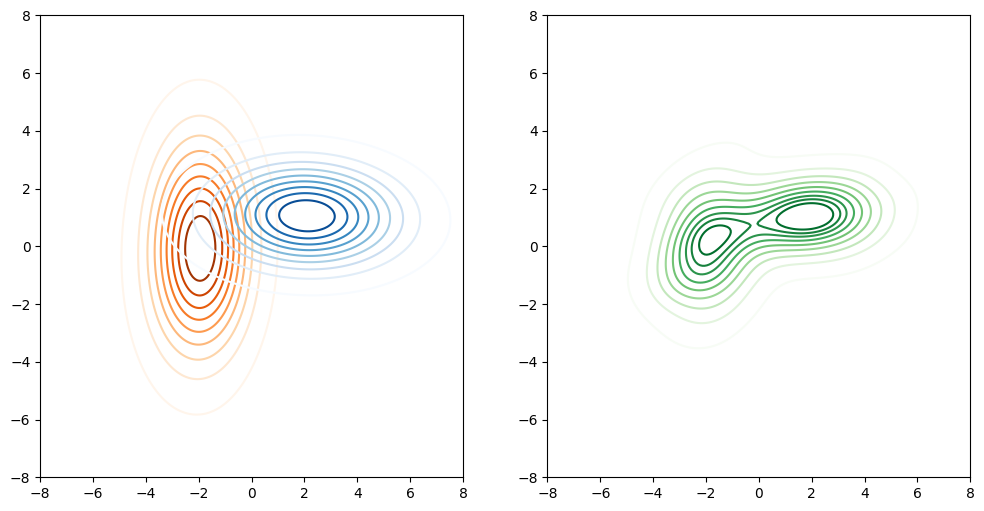

In [ ]:
# bivariate example
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cov = np.array([[1, 0.5], [0.5, 1]])

# conditional distributions
λ1 = np.array([0.5, 2])
mu1 = [-2, 0]
cov1 = cov * np.eye(2) * λ1
p1 = np.random.multivariate_normal(mu1, cov1, size=1000) # p(x|C_1) = p(x_1|C_1)p(x_2|C_1)

λ2 = np.array([2, 0.5])
mu2 = [2, 1]
cov2 = cov * np.eye(2) * λ2
p2 = np.random.multivariate_normal(mu2, cov2, size=1000)  # p(x|C_2) = p(x_1|C_2)p(x_2|C_2)

# unconditional distribution -- p(C_1) = p(C_2) = 0.5
rng = np.random.default_rng()
mixture = np.empty([1000, 2])
for i in range(1000):
    p = rng.binomial(1, 0.5)
    if p == 1: pmu, pcov = mu1, cov1
    else: pmu, pcov = mu2, cov2
    mixture[i] = rng.multivariate_normal(mean=pmu, cov=pcov)
    
fig, axs = plt.subplots(1, 2, figsize=(12,6))
for ax in axs: ax.set_ylim(-8, 8); ax.set_xlim(-8, 8)
sns.kdeplot(x=p1[:, 0], y=p1[:, 1], fill=False, cmap='Oranges', bw_adjust=4, ax=axs[0])
sns.kdeplot(x=p2[:, 0], y=p2[:, 1], fill=False, cmap='Blues', bw_adjust=4, ax=axs[0])

sns.kdeplot(x=mixture[:, 0], y=mixture[:, 1], fill=False, cmap='Greens', bw_adjust=1.5, ax=axs[1])

Here, the left figure is plots the conditional distributions $p(x|C_1)$ and $p(x|C_2)$ while the right figure plots the marginal distribution $p(x)$ over all classes, assuming equal class priors of $p(C_1) = p(C_2) = 0.5$

In this example, we factorize: $$p(x|C_k) = p(x_1|C_k) p(x_2|C_k)$$
With marginal density given by: $$p(x) = \sum_{k=1}^K p(x|C_k)p(C_k)$$

We can determine the probability the $x$ belongs to class $C_k$ using Bayes' Theorem:
$$p(C_k|x) = \frac{p(x|C_k)p(C_k)}{p(x)} = \frac{p(x|C_k)p(C_k)}{\sum p(x|C_k) p(C_k)}$$
Here we may often use empirical priors for $p(C_k)$ given by the frequency of class $C_k$ in our training data.

Consider this example. We can predict the value of $x$ by either the left plot (naive Bayes) or the right plot (Gaussian mixture). Clearly the right plot is more fine-grained, but the left plot is more simple. Thus, naive Bayes is useful in high dimensioned problems where density estimation is difficult. It also conveniently extends to problems where variables are both discrete and continuous since where can represent both discrete and continuous variables separately.

## 11.2.6 Markov Blanket

The Markov blanket (or "Markov boundary") of node $x_i$ is the set of all parents, children, and coparents of $x_i$.\
This set has the property that the conditional distribution of $x_i$ conditioned upon *all* nodes within the graph except for itself, is dependent only upon the variables in the Markov blanket.

In some sense, only the parents, co-parents, and children of a node $x_i$ in a DAG are dependent upon the node (and visa-versa). So, this set of nodes is called the Markov blanket of node $x_i$. This is the *minimal set* of nodes that isolate $x_i$ from the rest of the graph. 

# 11.3 Sequence Models

Consider a sequence $x_1,..,x_N$ where each $x_n$ is a vector. By applying the product rule a general distribution over $N$ can be written as the product of conditional distributions. If we order the decomposition such that it matches the ordering of the variables we may express the joint distribution as:
$$p(x_1,...,x_N) = \prod_{n=1}^N p(x_n|x_1,...,x_{n-1})$$

This corresponds to a directed graph in which each node is connected to all previous nodes in the sequence. This model is fully autoregressive because it is fully connected. But we can make it more parsimonious by trimming some of its edges. For instance, if we condition each variable only on its immediately preceding variable, then we get a chain:
$$p(x_1,...,x_N) = p(x_1)\prod_{n=1}^N p(x_n|x_{n-1})$$

This expresses a ***Markov Chain***, for which each node possesses the ***Markov Property***: it is dependent only upon the node immediately preceding it (and is thus conditionally independent of all other preceding nodes).

If we extend this chain to be conditional upon more preceding nodes, then we specify a *higher-order* Markov model. E.g. a second-order Markov model is:
$$p(x_1,...,x_N) = p(x_1)p(x_2|x_1)\prod_{k=3}^K p(x_n|x_{n-1}, x_{n-2})$$

Note that the free parameters for a Markov model of order $M$ is: $$K^{M-1}(K-1)$$
Thus, the parameter space scales exponentially with model order.

## 11.3.1 Hidden Variables

Latent variables $z_n$ can help us to make sequential models that are not limited by the Markov assumption at any order.\
For each observation $x_n$ we introduce a latent variable $z_n$, and we assume that *the latent variables* form a Markov chain. This gives rise to a graphical model known as a ***State-Space Model***. The latent variables are specified such that $z_{n-1}$ and $z_{n+1}$ are independent to each other conditional upon $z_n$: $$z_{n+1} \perp z_{n-1} | z_n$$

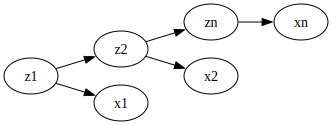

In [90]:
dot = graphviz.Digraph()
dot.attr(rankdir='LR')
hidden = ['z1', 'z2', 'zn']
vars = ['x1', 'x2', 'xn']
for n in hidden + vars: dot.node(n)
for e in zip(hidden, vars): dot.edge(e[0], e[1])
dot.edge('z1', 'z2'); dot.edge('z2', 'zn')
dot

The joint distribution is then: $$p(x_1,..,x_N, z_1,...,z_N) = \bigg[\prod_{n=2}^N p(z_n|z_{n-1})\bigg]\prod_{n=1}^N p(x_n|z_n)$$

Because the hidden variables are never observed, there is *no conditional independence* between any two observable variables $x_n$ and $x_m$. Thus the predictive distribution $p(x_{n+1}|x_1,...,x_n)$ for observation $x_{n+1}$ given *all previous observations* does not exhibit any conditional indpendence and therefore does not satisfy the Markov property at *any order*.

This is a super handy hack. We can retain the "memory" of distant states when predicting $x_n$ within the latent variable Markov process because the latent variables are not observed and therefore $x_n$ is conditionally dependent upon all previous observable states. Crucially, the latent Markov process is only first order so it only has $K(K-1)$ free parameters. We get long-range dependencies with economical parameter spaces.

This is nifty, but enigmatic... like, how does the latent process actually retain memory better than a first-order Markov process over the observables.......? It's sort of like data compression, where we learn a latent process that represents the causal chain more efficiently than the chain of observables.....

The book unfortunately doesn't dig into this more beyond noting that these model are called ***Hidden Markov Models*** when the latent variables are discrete (regardless of whether the observables are discrete or continuous), and ***Kalman Filters*** when botht he latent variables and the observables are continuous (typically Gaussians).

We may also model each $p(x_n|z_n)$ using neural nets...